In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer,MissingIndicator
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [57]:
df=pd.read_csv("../data/predictiveMaintenance_26122021_031456.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [64]:
df.shape

(10000, 10)

In [65]:
df.isna().sum() # No Null values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [58]:
# Classification problem so we can drop Failure Type ,UDI and Product ID
df.drop(['Failure Type','UDI','Product ID'],inplace=True,axis=1)

In [59]:
df.shape

(10000, 7)

In [68]:
df.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
dtype: object

A categorical feature is present . Need to check the value type . Is it ordinal or nominal ?

In [60]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [70]:
df.groupby('Type',as_index=False)['Target'].count()

,Type,Target
0,H,1003
1,L,6000
2,M,2997


Check counts of target values

In [71]:
df['Target'].value_counts() #Heavily imbalanced

0    9661
1     339
Name: Target, dtype: int64

In [61]:
# Separate independent and dependent features
X=df.drop(['Target'],axis=1)
y=df[['Target']]

In [69]:
len(y.value_counts())

2

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1.333889,-0.952389,-0.947360,0.068185,0.282200,-1.695984
1,-0.332223,-0.902393,-0.879959,-0.729472,0.633308,-1.648852
2,-0.332223,-0.952389,-1.014761,-0.227450,0.944290,-1.617430
3,-0.332223,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009
4,-0.332223,-0.902393,-0.879959,-0.729472,0.001313,-1.554588


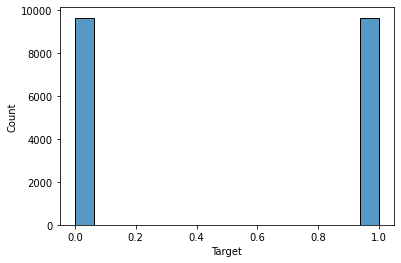

In [89]:
oversam=RandomOverSampler(sampling_strategy='minority')
X_resampled,y_resampled=oversam.fit_resample(X,y)
y_resampled['Target'].value_counts()
sns.histplot(y_resampled['Target'])
X_resampled.head()

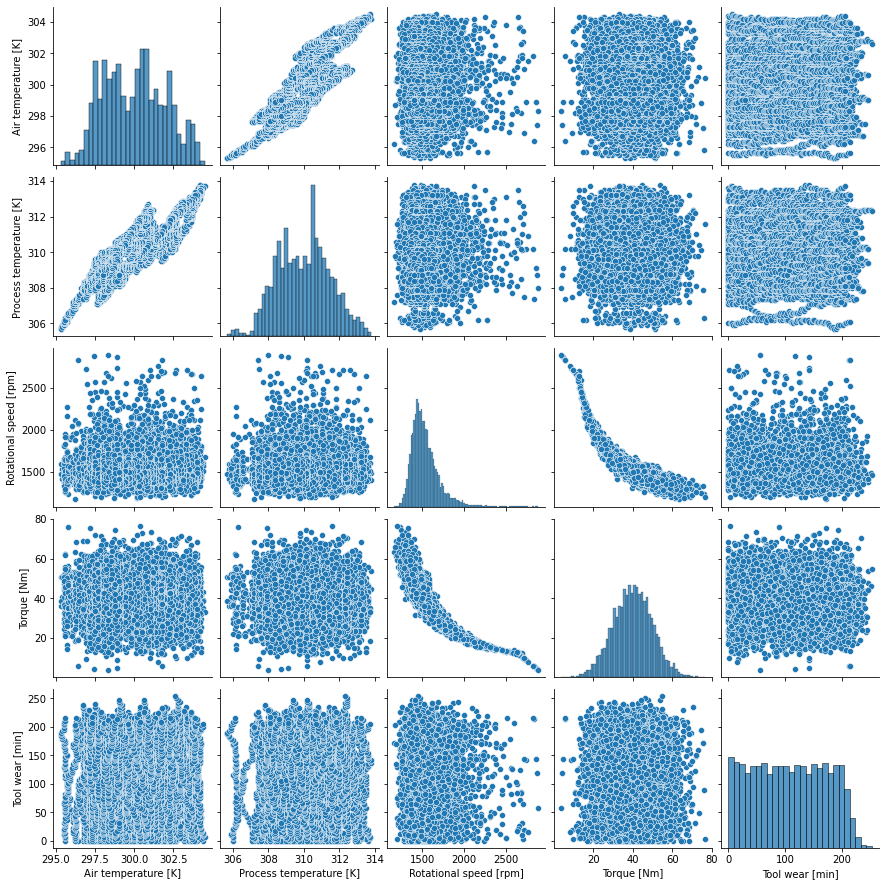

In [74]:
sns.pairplot(X)

In [75]:
ordinal_encoder=preprocessing.OrdinalEncoder()
X[['Type']]=ordinal_encoder.fit_transform(X[['Type']])

In [76]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2.0,298.1,308.6,1551,42.8,0
1,1.0,298.2,308.7,1408,46.3,3
2,1.0,298.1,308.5,1498,49.4,5
3,1.0,298.2,308.6,1433,39.5,7
4,1.0,298.2,308.7,1408,40.0,9


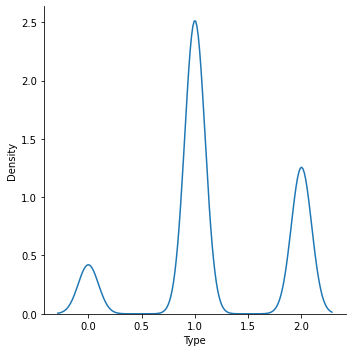

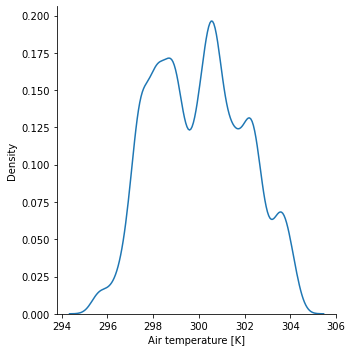

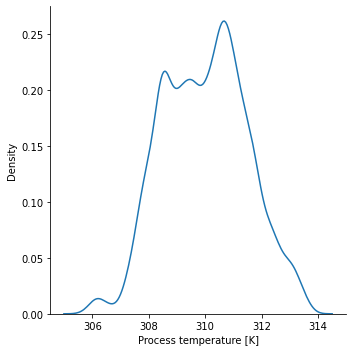

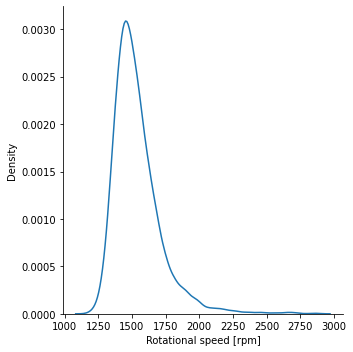

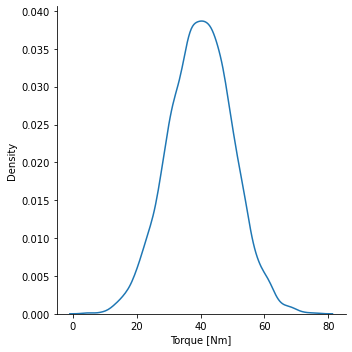

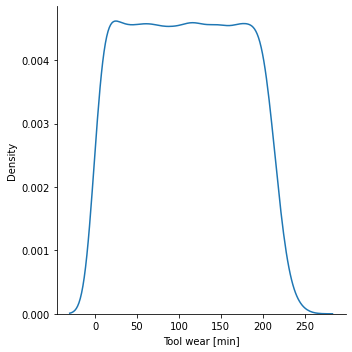

In [77]:
for feature in X.columns:
    sns.displot(X[feature],kind='kde') #Not all are normal distributions. Need to convert them

In [78]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1.333889,-0.952389,-0.947360,0.068185,0.282200,-1.695984
1,-0.332223,-0.902393,-0.879959,-0.729472,0.633308,-1.648852
2,-0.332223,-0.952389,-1.014761,-0.227450,0.944290,-1.617430
3,-0.332223,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009
4,-0.332223,-0.902393,-0.879959,-0.729472,0.001313,-1.554588


In [81]:
Q1=X.quantile(0.25)
Q3=X.quantile(0.75)
X_outlier=X[~((X<(Q1-1.5*IQR))|(X>(Q3+1.5*IQR))).any(axis=1)]
IQR=Q3-Q1
print(IQR)
len(~((X<(Q1-1.5*IQR))|(X>(Q3+1.5*IQR))).any(axis=1))
print(X_outlier.shape)

Type                       1.666112
Air temperature [K]        1.599873
Process temperature [K]    1.550220
Rotational speed [rpm]     1.054245
Torque [Nm]                1.364306
Tool wear [min]            1.712464
dtype: float64
(9541, 6)


In [82]:
X_outlier.drop_duplicates(inplace=True) #No duplicates

C:\Home\Git\PredictiveMaintenance\venv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [83]:
X_outlier.shape

(9541, 6)

In [87]:
corr_matrix = X_outlier.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['Process temperature [K]', 'Torque [Nm]']

In [86]:
corr = X_outlier.corr()
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Temp/ipykernel_23588/3723641848.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Type,nan,nan,nan,nan,nan,nan
Air temperature [K],0.02,nan,nan,nan,nan,nan
Process temperature [K],0.01,0.88,nan,nan,nan,nan
Rotational speed [rpm],-0.01,0.01,0.02,nan,nan,nan
Torque [Nm],0.01,-0.01,-0.01,-0.89,nan,nan
Tool wear [min],-0.00,0.02,0.02,0.01,-0.01,nan


In [88]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #Removing both constant and quasi-constant
var_thr.fit(X_outlier)
#var_thr.get_support()
concol = [column for column in X_outlier.columns 
          if column not in X_outlier.columns[var_thr.get_support()]]
for features in concol:
    print(features)
print(len(concol))

0


In [16]:
test_df=pd.read_csv("../results.csv")
test_df.head()
test_df.drop(columns=test_df.columns[0],inplace=True,axis=1)

In [17]:
test_df.head(30)

,model,metrics,values
0,LogReg,test_f1_weighted,0.808064
1,LogReg,test_f1_weighted,0.808064
2,LogReg,test_f1_weighted,0.808064
3,LogReg,test_f1_weighted,0.808064
4,LogReg,test_f1_weighted,0.808064
5,LogReg,test_f1_weighted,0.808064
6,LogReg,test_accuracy,0.808133
7,LogReg,test_recall_weighted,0.808133
8,LogReg,test_accuracy,0.808133
9,LogReg,test_accuracy,0.808133


In [55]:
top_model=test_df.groupby(['metrics']).max().reset_index()
top_model.head()
val=top_model.loc[top_model['metrics']=='test_recall_weighted']['model'].reset_index(drop=True)
print(val.iloc[0])
print(type(val.iloc[0]))
model_dir='../models'
for model in os.listdir(model_dir):
    if model.startswith(val.iloc[0]):
        print(model)  

XGB
<class 'str'>
XGB.pkl


In [74]:
df=pd.DataFrame(
    {"Product ID":["M14860"],
     "Type":["M"],
     "Air temperature [K]":[298.1],
     "Process temperature [K]":[308.6],
     "Rotational speed [rpm]":[1551],
     "Torque [Nm]":[42.8],
     "Tool wear [min]":[0],
     "Failure Type":["No Failure"]}
)
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M14860,M,298.1,308.6,1551,42.8,0,No Failure
